In [47]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline


## DataFrames

In [2]:
df=pd.DataFrame({'growth':[.5,.6,1.8],'Name':['ram','shyam','hari']},)
df

,growth,Name
0,0.5,ram
1,0.6,shyam
2,1.8,hari


#### To access a row by location,index off the iloc attribute


In [3]:
df.iloc[2]

growth     1.8
Name      hari
Name: 2, dtype: object

In [7]:
p=df['Name'].str.upper()

In [8]:
p

0      RAM
1    SHYAM
2     HARI
Name: Name, dtype: object

### Dataframes can be created from many types of input
 - columns(dicts of lists)
 - rows(list of dicts)
 - CSV file (pd.read_csv)
 - from numpy ndarrray
 - And more SQL,HDF5,etc

In [9]:
pd.DataFrame([{'growth':.5,'Name':'Paul'},{'growth':.7,'Name':'hari'},{'growth':1.2,'Name':'ratan'}])

,growth,Name
0,0.5,Paul
1,0.7,hari
2,1.2,ratan


### A dataframe can be instantiated from a Numpy array as well . The columns names will need to be specified

In [12]:
pd.DataFrame(np.random.randn(10,3),columns=["a","b","c"])

,a,b,c
0,-1.247845,-0.719911,-0.343510
1,0.182408,0.182630,0.161334
2,0.436537,0.120187,-0.329524
3,-0.613604,-0.797355,-1.039566
4,1.241051,0.195741,1.390150
5,0.754209,0.802152,-0.276730
6,0.009977,0.412557,0.487946
7,-0.621901,0.646829,0.360581
8,1.080143,0.221117,0.431686
9,-0.166956,0.408164,2.898825


### DataFrame Axis
 - There are two axis for a data Frame. They are commonly referred as to as axis 0 and 1 or the rowindex axis and columns index axis respectively

In [15]:
df.axes

[RangeIndex(start=0, stop=3, step=1),
 Index(['growth', 'Name'], dtype='object')]

In [16]:
df.axes[0]

RangeIndex(start=0, stop=3, step=1)

In [19]:
df.axes[1]

Index(['growth', 'Name'], dtype='object')

#### if we want to sum up each of the columns or rows in 

In [20]:
df.apply(np.sum,axis=0)

growth             2.9
Name      ramshyamhari
dtype: object

In [23]:
# df.apply(np.sum,axis=1) # throws and error because of different datatype

NameError: name 'StringIO' is not defined

## DataFrame Example

In [97]:
data = StringIO('''LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
... Big Mountain Pass Aid Station,39.07,7432,11579,43.8%
... Mules Ear Meadow,40.75,7478,12008,45.4%
... Bald Mountain,42.46,7869,12593,47.6%
98
... Pence Point,43.99,7521,12813,48.4%
... Alexander Ridge Aid Station,46.9,6160,13169,49.8%
... Alexander Springs,47.97,5956,13319,50.3%
... Rogers Trail junction,49.52,6698,13967,52.8%
... Rogers Saddle,49.77,6790,14073,53.2%
... Railroad Bed,50.15,6520,,
... Lambs Canyon Underpass Aid Station,52.48,6111,14329,54.2%''')

In [98]:
df=pd.read_csv(data)

In [29]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Aid Station,39.07,7432.0,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478.0,12008.0,45.4%
2,Bald Mountain,42.46,7869.0,12593.0,47.6%
3,98,NaN,NaN,NaN,NaN
4,Pence Point,43.99,7521.0,12813.0,48.4%
5,Alexander Ridge Aid Station,46.90,6160.0,13169.0,49.8%
6,Alexander Springs,47.97,5956.0,13319.0,50.3%
7,Rogers Trail junction,49.52,6698.0,13967.0,52.8%
8,Rogers Saddle,49.77,6790.0,14073.0,53.2%
9,Railroad Bed,50.15,6520.0,NaN,NaN


### Looking at the data

In [31]:
df.describe()

,MILES,ELEVATION,CUMUL
count,10.000000,10.000000,9.000000
mean,46.306000,6853.500000,13094.444444
std,4.493574,681.391428,942.511686
min,39.070000,5956.000000,11579.000000
25%,42.842500,6250.000000,12593.000000
50%,47.435000,6744.000000,13169.000000
75%,49.707500,7466.500000,13967.000000
max,52.480000,7869.000000,14329.000000


In [37]:
df['LOCATION'].nunique()

11

In [38]:
df['LOCATION'].value_counts()

Big Mountain Pass Aid Station         1
Mules Ear Meadow                      1
Bald Mountain                         1
98                                    1
Pence Point                           1
Alexander Ridge Aid Station           1
Alexander Springs                     1
Rogers Trail junction                 1
Rogers Saddle                         1
Railroad Bed                          1
Lambs Canyon Underpass Aid Station    1
Name: LOCATION, dtype: int64

#### The Pearson correlation coefficient, often denoted as \(r\), is a statistical measure that quantifies the strength and direction of a linear relationship between two continuous variables. It assesses how well the relationship between the variables can be described by a straight line.

The formula for calculating the Pearson correlation coefficient between two variables \(X\) and \(Y\) is as follows:

\[r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2}\sum{(Y_i - \bar{Y})^2}}}\]

Where:
- \(X_i\) and \(Y_i\) are individual data points.
- \(\bar{X}\) and \(\bar{Y}\) are the means (averages) of \(X\) and \(Y\) respectively.
- The summation symbol \(\sum\) represents the sum of the values over all data points.

Key points to note about the Pearson correlation coefficient:

1. Range: The Pearson correlation coefficient ranges from -1 to 1.
   - \(r = 1\) indicates a perfect positive linear relationship (as \(X\) increases, \(Y\) increases proportionally).
   - \(r = -1\) indicates a perfect negative linear relationship (as \(X\) increases, \(Y\) decreases proportionally).
   - \(r = 0\) indicates no linear relationship (no correlation).

2. Direction:
   - A positive \(r\) indicates a positive correlation (both variables tend to increase together).
   - A negative \(r\) indicates a negative correlation (one variable tends to increase as the other decreases).

3. Strength: The absolute value of \(r\) indicates the strength of the correlation. Closer to 1 (either positive or negative) suggests a stronger linear relationship, while closer to 0 suggests a weaker linear relationship.

4. Assumptions: The Pearson correlation coefficient assumes that the relationship between the variables is linear, and it may not accurately capture non-linear relationships.

5. Sensitivity to Outliers: Pearson's correlation can be sensitive to outliers, meaning that a few extreme data points can disproportionately influence the value of \(r\).

Pearson correlation is widely used in various fields, including statistics, economics, social sciences, and data analysis, to assess the linear association between two continuous variables. It helps researchers and analysts understand the extent to which changes in one variable are associated with changes in another.

In [40]:
df.corr()

C:\Users\puzan12\AppData\Local\Temp\ipykernel_8248\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MILES,ELEVATION,CUMUL
MILES,1.000000,-0.783780,0.986613
ELEVATION,-0.783780,1.000000,-0.674333
CUMUL,0.986613,-0.674333,1.000000


### plotting with DataFrames

<Axes: >

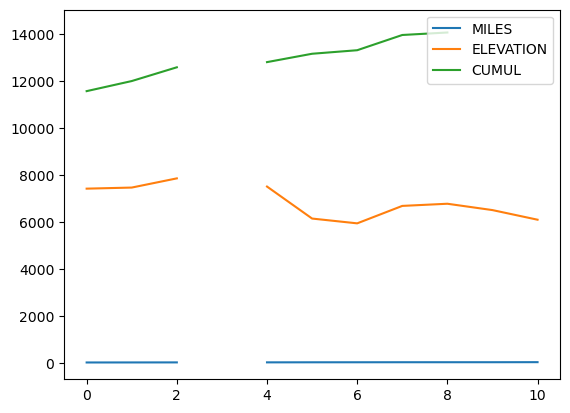

In [48]:
fig=plt.figure()
axis=fig.add_subplot(111)
df.plot(ax=axis)


Text(0, 0.5, 'Distance')

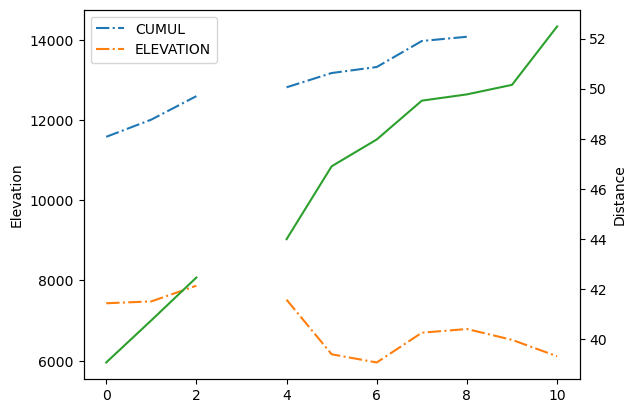

In [56]:
fig=plt.figure()
ax=fig.add_subplot(111) # 1 rows 1 columns last 1 represent index of the subplot 
df[['CUMUL','ELEVATION']].plot(ax=ax,linestyle='dashdot')
df['MILES'].plot(secondary_y=True)
ax.set_ylabel('Elevation')
ax.right_ax.set_ylabel('Distance')

-  the use of double brackets is a pandas convention to indicate that you're performing column selection and allows you to select multiple columns simultaneously.

In [51]:
df[['CUMUL',"ELEVATION"]] # 

,CUMUL,ELEVATION
0,11579.0,7432.0
1,12008.0,7478.0
2,12593.0,7869.0
3,NaN,NaN
4,12813.0,7521.0
5,13169.0,6160.0
6,13319.0,5956.0
7,13967.0,6698.0
8,14073.0,6790.0
9,NaN,6520.0


### Adding Rows

In [59]:
df2=pd.DataFrame([('Damak',34.14,6628,14805,'56.06%')],columns=['LOCATION','MILES','ELEVATION','CUMUL','% CUMUL GAIN'])

In [69]:
print(pd.concat([df,df2],ignore_index=True).to_string(line_width=60))

                              LOCATION  MILES  ELEVATION  \
0        Big Mountain Pass Aid Station  39.07     7432.0   
1                     Mules Ear Meadow  40.75     7478.0   
2                        Bald Mountain  42.46     7869.0   
3                                   98    NaN        NaN   
4                          Pence Point  43.99     7521.0   
5          Alexander Ridge Aid Station  46.90     6160.0   
6                    Alexander Springs  47.97     5956.0   
7                Rogers Trail junction  49.52     6698.0   
8                        Rogers Saddle  49.77     6790.0   
9                         Railroad Bed  50.15     6520.0   
10  Lambs Canyon Underpass Aid Station  52.48     6111.0   
11                               Damak  34.14     6628.0   

      CUMUL % CUMUL GAIN  
0   11579.0        43.8%  
1   12008.0        45.4%  
2   12593.0        47.6%  
3       NaN          NaN  
4   12813.0        48.4%  
5   13169.0        49.8%  
6   13319.0        50.3%  
7  

### Adding Columns

In [101]:
df['Bogus']=pd.Series(np.random.randint(0,21,11))

In [78]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,Bogus
0,Big Mountain Pass Aid Station,39.07,7432.0,11579.0,43.8%,2,15
1,Mules Ear Meadow,40.75,7478.0,12008.0,45.4%,19,0
2,Bald Mountain,42.46,7869.0,12593.0,47.6%,0,12
3,98,NaN,NaN,NaN,NaN,4,6
4,Pence Point,43.99,7521.0,12813.0,48.4%,7,11
5,Alexander Ridge Aid Station,46.90,6160.0,13169.0,49.8%,3,18
6,Alexander Springs,47.97,5956.0,13319.0,50.3%,15,7
7,Rogers Trail junction,49.52,6698.0,13967.0,52.8%,11,18
8,Rogers Saddle,49.77,6790.0,14073.0,53.2%,0,13
9,Railroad Bed,50.15,6520.0,NaN,NaN,11,1


In [79]:
def addstation(val):
    return 'Station' in val


In [100]:
df["Station"]=df['LOCATION'].apply(addstation)

In [81]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,Bogus,Station
0,Big Mountain Pass Aid Station,39.07,7432.0,11579.0,43.8%,2,15,True
1,Mules Ear Meadow,40.75,7478.0,12008.0,45.4%,19,0,False
2,Bald Mountain,42.46,7869.0,12593.0,47.6%,0,12,False
3,98,NaN,NaN,NaN,NaN,4,6,False
4,Pence Point,43.99,7521.0,12813.0,48.4%,7,11,False
5,Alexander Ridge Aid Station,46.90,6160.0,13169.0,49.8%,3,18,True
6,Alexander Springs,47.97,5956.0,13319.0,50.3%,15,7,False
7,Rogers Trail junction,49.52,6698.0,13967.0,52.8%,11,18,False
8,Rogers Saddle,49.77,6790.0,14073.0,53.2%,0,13,False
9,Railroad Bed,50.15,6520.0,NaN,NaN,11,1,False


### Deleting Rows

- The pandas data frame has a .drop method that takes a sequence of index values. 

In [82]:
df.drop([5,9])

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,Bogus,Station
0,Big Mountain Pass Aid Station,39.07,7432.0,11579.0,43.8%,2,15,True
1,Mules Ear Meadow,40.75,7478.0,12008.0,45.4%,19,0,False
2,Bald Mountain,42.46,7869.0,12593.0,47.6%,0,12,False
3,98,NaN,NaN,NaN,NaN,4,6,False
4,Pence Point,43.99,7521.0,12813.0,48.4%,7,11,False
6,Alexander Springs,47.97,5956.0,13319.0,50.3%,15,7,False
7,Rogers Trail junction,49.52,6698.0,13967.0,52.8%,11,18,False
8,Rogers Saddle,49.77,6790.0,14073.0,53.2%,0,13,False
10,Lambs Canyon Underpass Aid Station,52.48,6111.0,14329.0,54.2%,17,19,True


In [89]:
df.drop(df.index[5:10:4])

,MILES,ELEVATION,CUMUL,% CUMUL GAIN,bogus,Bogus,Station
0,39.07,7432.0,11579.0,43.8%,2,15,True
1,40.75,7478.0,12008.0,45.4%,19,0,False
2,42.46,7869.0,12593.0,47.6%,0,12,False
3,NaN,NaN,NaN,NaN,4,6,False
4,43.99,7521.0,12813.0,48.4%,7,11,False
6,47.97,5956.0,13319.0,50.3%,15,7,False
7,49.52,6698.0,13967.0,52.8%,11,18,False
8,49.77,6790.0,14073.0,53.2%,0,13,False
10,52.48,6111.0,14329.0,54.2%,17,19,True


## Deleting Columns
- .pop()
- .drop() with axis =1
- del statement

In [90]:
df.pop('LOCATION')

KeyError: 'LOCATION'

In [91]:
del df['bogus']

In [94]:
df

,MILES,ELEVATION,CUMUL,% CUMUL GAIN,Bogus,Station
0,39.07,7432.0,11579.0,43.8%,15,True
1,40.75,7478.0,12008.0,45.4%,0,False
2,42.46,7869.0,12593.0,47.6%,12,False
3,NaN,NaN,NaN,NaN,6,False
4,43.99,7521.0,12813.0,48.4%,11,False
5,46.90,6160.0,13169.0,49.8%,18,True
6,47.97,5956.0,13319.0,50.3%,7,False
7,49.52,6698.0,13967.0,52.8%,18,False
8,49.77,6790.0,14073.0,53.2%,13,False
9,50.15,6520.0,NaN,NaN,1,False


In [95]:
df.drop(['CUMUL'],axis=1)

,MILES,ELEVATION,% CUMUL GAIN,Bogus,Station
0,39.07,7432.0,43.8%,15,True
1,40.75,7478.0,45.4%,0,False
2,42.46,7869.0,47.6%,12,False
3,NaN,NaN,NaN,6,False
4,43.99,7521.0,48.4%,11,False
5,46.90,6160.0,49.8%,18,True
6,47.97,5956.0,50.3%,7,False
7,49.52,6698.0,52.8%,18,False
8,49.77,6790.0,53.2%,13,False
9,50.15,6520.0,NaN,1,False


In [99]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN
0,Big Mountain Pass Aid Station,39.07,7432.0,11579.0,43.8%
1,Mules Ear Meadow,40.75,7478.0,12008.0,45.4%
2,Bald Mountain,42.46,7869.0,12593.0,47.6%
3,98,NaN,NaN,NaN,NaN
4,Pence Point,43.99,7521.0,12813.0,48.4%
5,Alexander Ridge Aid Station,46.90,6160.0,13169.0,49.8%
6,Alexander Springs,47.97,5956.0,13319.0,50.3%
7,Rogers Trail junction,49.52,6698.0,13967.0,52.8%
8,Rogers Saddle,49.77,6790.0,14073.0,53.2%
9,Railroad Bed,50.15,6520.0,NaN,NaN


In [102]:
df

,LOCATION,MILES,ELEVATION,CUMUL,% CUMUL GAIN,Station,Bogus
0,Big Mountain Pass Aid Station,39.07,7432.0,11579.0,43.8%,True,13
1,Mules Ear Meadow,40.75,7478.0,12008.0,45.4%,False,2
2,Bald Mountain,42.46,7869.0,12593.0,47.6%,False,4
3,98,NaN,NaN,NaN,NaN,False,20
4,Pence Point,43.99,7521.0,12813.0,48.4%,False,8
5,Alexander Ridge Aid Station,46.90,6160.0,13169.0,49.8%,True,9
6,Alexander Springs,47.97,5956.0,13319.0,50.3%,False,15
7,Rogers Trail junction,49.52,6698.0,13967.0,52.8%,False,6
8,Rogers Saddle,49.77,6790.0,14073.0,53.2%,False,15
9,Railroad Bed,50.15,6520.0,NaN,NaN,False,4


### DataFrames Methods

In [103]:
data = StringIO('''UPC,Units,Sales,Date
... 1234,5,20.2,1-1-2014
... 1234,2,8.,1-2-2014
... 1234,3,13.,1-3-2014
... 789,1,2.,1-1-2014
... 789,2,3.8,1-2-2014
... 789,,,1-3-2014
... 789,1,1.8,1-5-2014''')

In [104]:
sales=pd.read_csv(data)

In [105]:
sales

,UPC,Units,Sales,Date
0,1234,5.0,20.2,1-1-2014
1,1234,2.0,8.0,1-2-2014
2,1234,3.0,13.0,1-3-2014
3,789,1.0,2.0,1-1-2014
4,789,2.0,3.8,1-2-2014
5,789,NaN,NaN,1-3-2014
6,789,1.0,1.8,1-5-2014


## DataFrame Attributes

In [106]:
sales.axes

[RangeIndex(start=0, stop=7, step=1),
 Index(['UPC', 'Units', 'Sales', 'Date'], dtype='object')]

In [107]:
sales.index

RangeIndex(start=0, stop=7, step=1)

In [108]:
sales.columns

Index(['UPC', 'Units', 'Sales', 'Date'], dtype='object')

In [109]:
sales.shape

(7, 4)

- The .info method summarizes the types and columns of a data frame. Italso provides insight into how much memory is being consumed. When you have larger data sets, this information is useful to see where memoryis going.

In [111]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UPC     7 non-null      int64  
 1   Units   6 non-null      float64
 2   Sales   6 non-null      float64
 3   Date    7 non-null      object 
dtypes: float64(2), int64(1), object(1)
memory usage: 356.0+ bytes


### Iteration

In [112]:
for cols in sales:
    print(cols)

UPC
Units
Sales
Date


 - The .keys method is a more explicit synonym for the default iteration behavior:

In [114]:
for cols in sales.keys():
    print(cols)

UPC
Units
Sales
Date


 - . The .iteritems returns pairs of column names and the individual column (as a series)

In [118]:
for col, ser in sales.iteritems():
    print(col,ser)

UPC 0    1234
1    1234
2    1234
3     789
4     789
5     789
6     789
Name: UPC, dtype: int64
Units 0    5.0
1    2.0
2    3.0
3    1.0
4    2.0
5    NaN
6    1.0
Name: Units, dtype: float64
Sales 0    20.2
1     8.0
2    13.0
3     2.0
4     3.8
5     NaN
6     1.8
Name: Sales, dtype: float64
Date 0    1-1-2014
1    1-2-2014
2    1-3-2014
3    1-1-2014
4    1-2-2014
5    1-3-2014
6    1-5-2014
Name: Date, dtype: object


C:\Users\puzan12\AppData\Local\Temp\ipykernel_8248\3994902019.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, ser in sales.iteritems():


## Arithmetic